<a href="https://colab.research.google.com/github/ManasviAtGitHub/Business-Intelligence/blob/main/Tree_based_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

In [ ]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/MyDrive/Datasets/

/content/drive/MyDrive/Datasets


In [ ]:
df = pd.read_csv('heart_disease.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [ ]:
df.head()

age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0

In [ ]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [ ]:
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

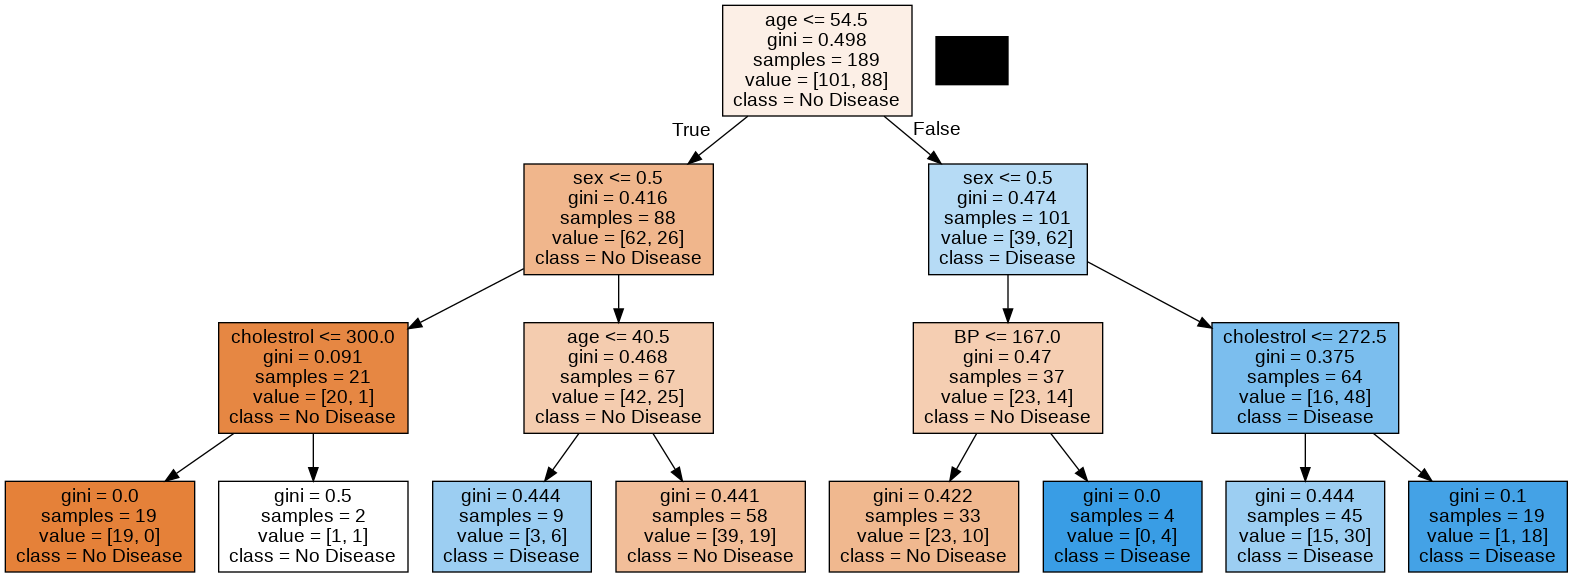

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]])

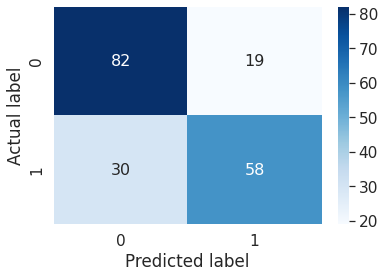

In [ ]:
cm1 = confusion_matrix(y_train, y_train_pred)
df_cm1 = pd.DataFrame(cm1, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print("Classification report - \n", classification_report(y_train, y_train_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.73      0.81      0.77       101
           1       0.75      0.66      0.70        88

    accuracy                           0.74       189
   macro avg       0.74      0.74      0.74       189
weighted avg       0.74      0.74      0.74       189



In [ ]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]])

In [ ]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [ ]:
def plot_confusionMatrix (predicted, actual):

    cm1 = confusion_matrix(actual, predicted)
    df_cm1 = pd.DataFrame(cm1, range(2), range(2))
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    print("Classification report - \n",classification_report(actual, predicted))


In [ ]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    plot_confusionMatrix(y_train, dt_classifier.predict(X_train))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    plot_confusionMatrix(y_test, dt_classifier.predict(X_test))
    

In [ ]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

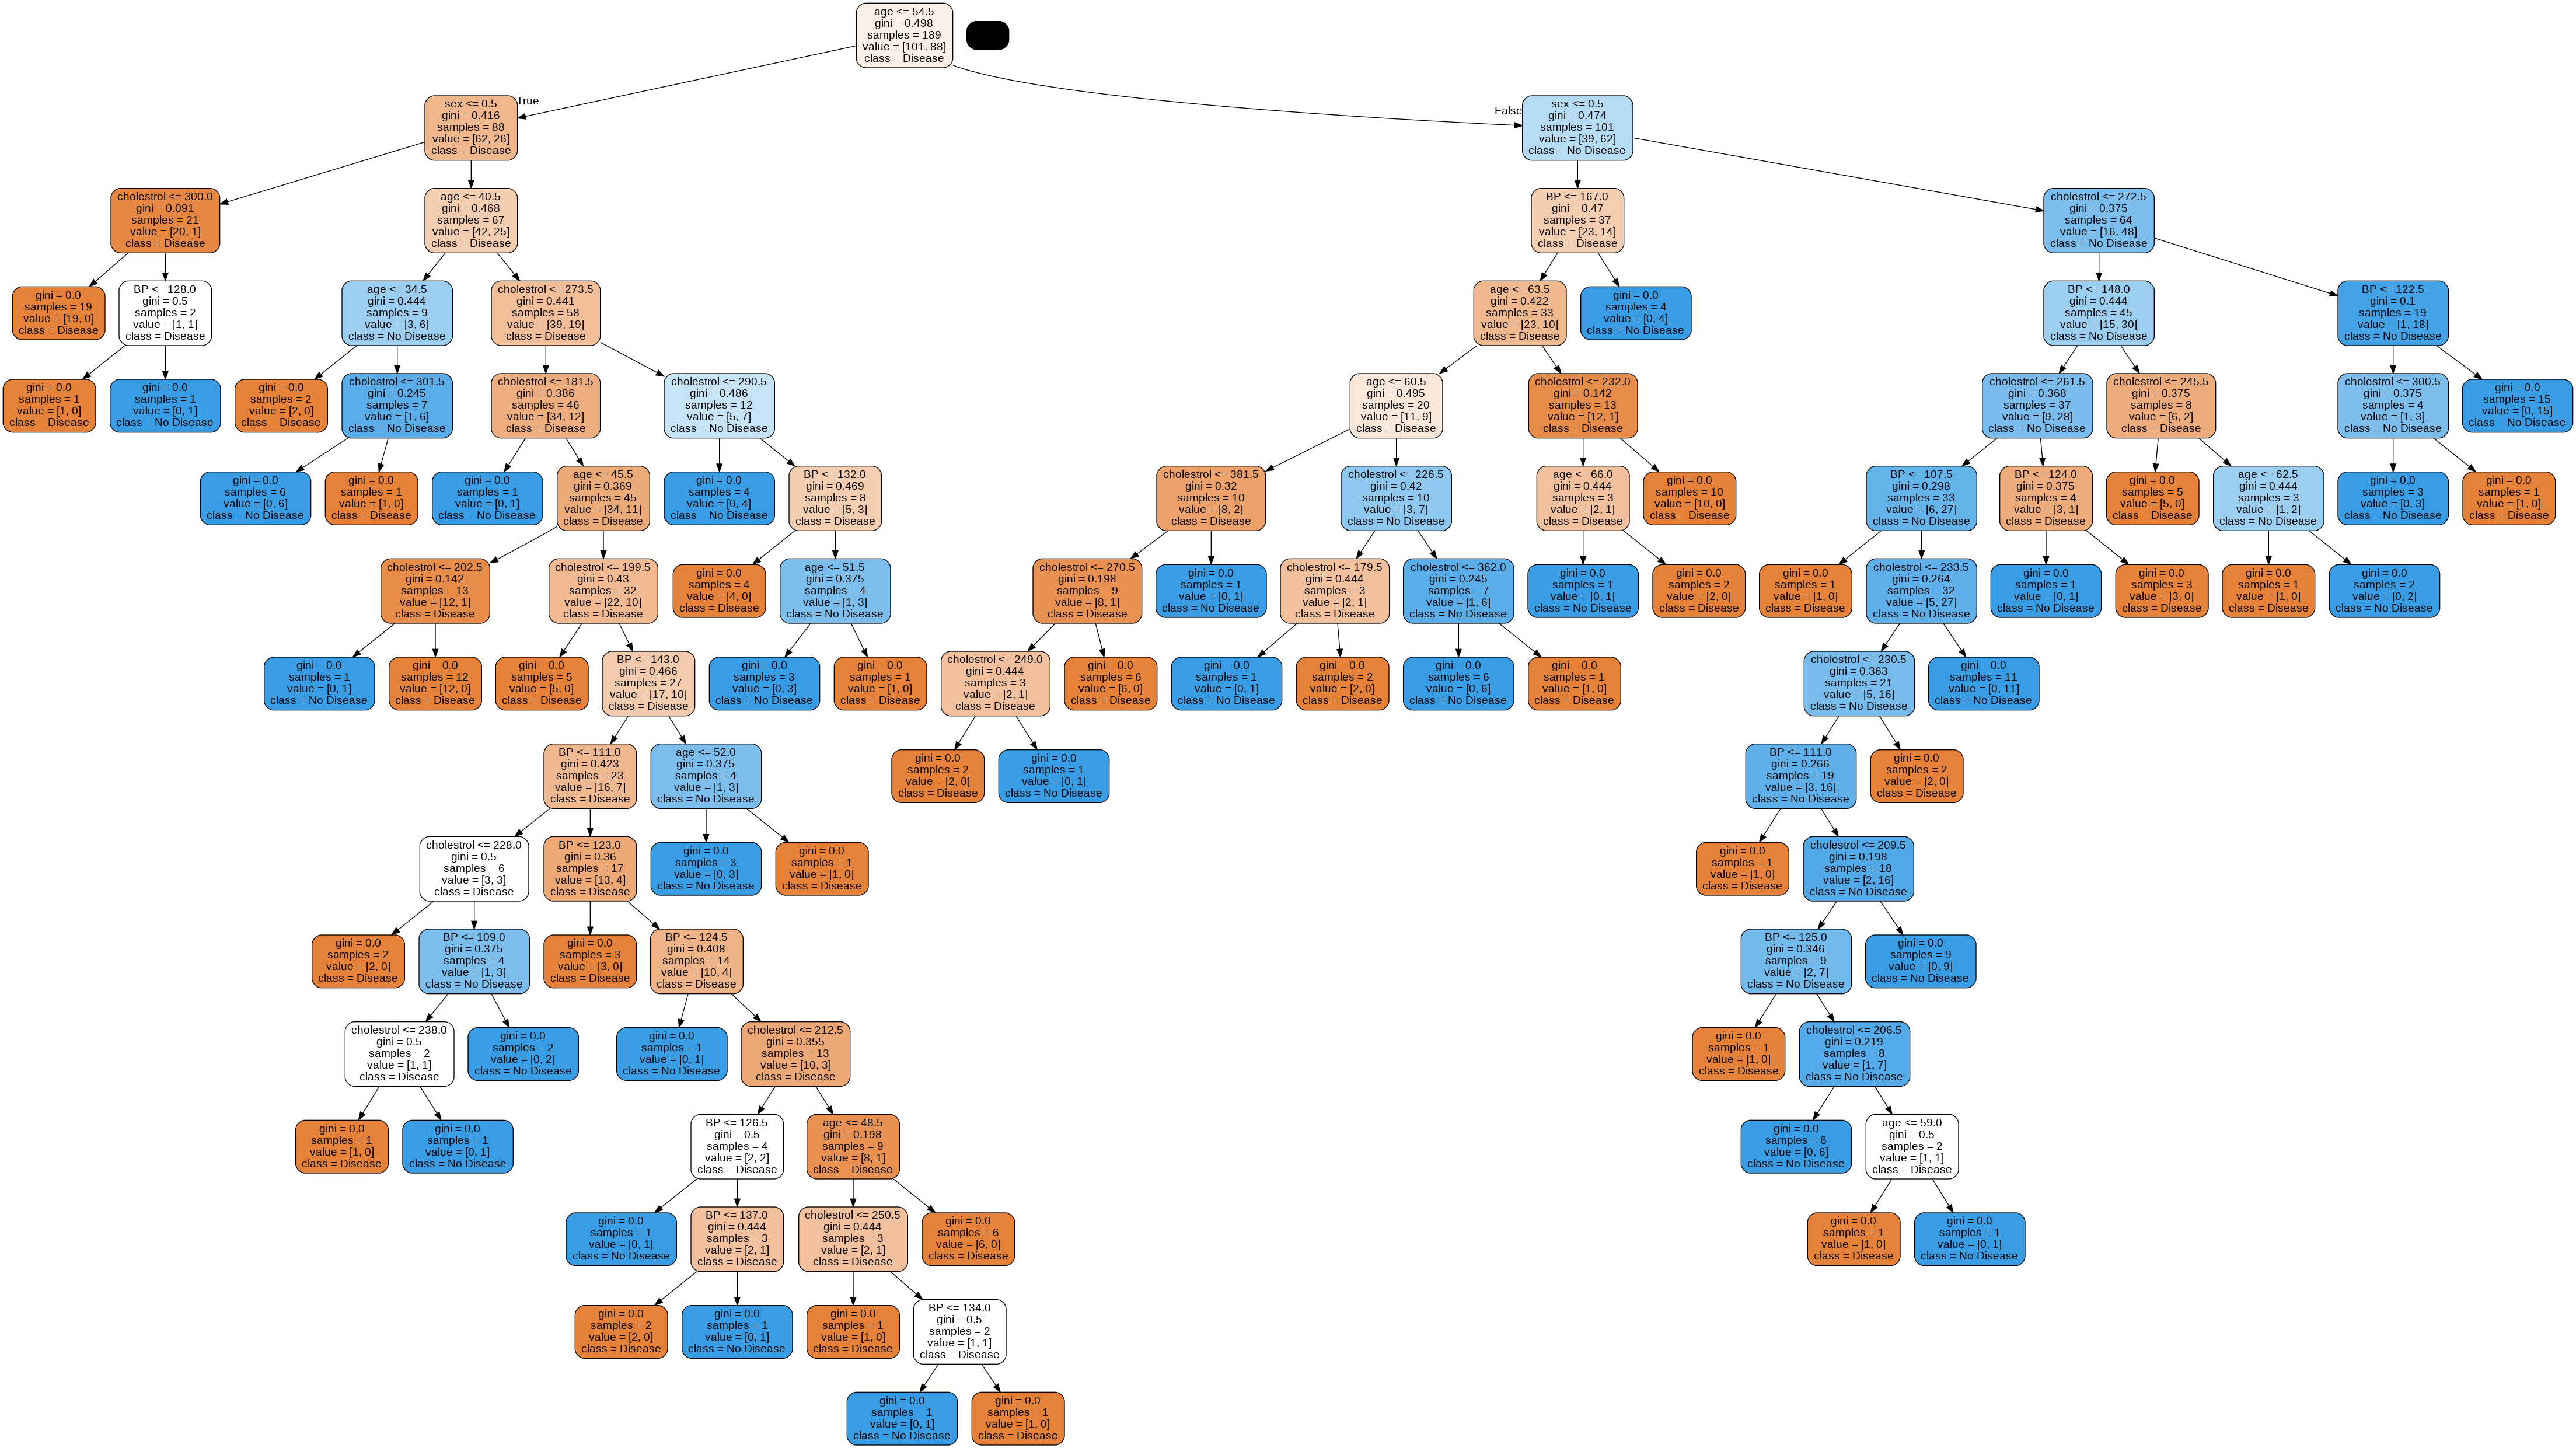

In [ ]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

Train Accuracy : 1.0
Train Confusion Matrix:


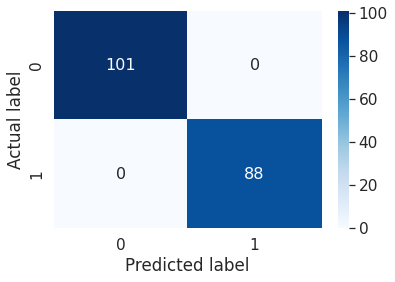

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        88

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189

--------------------------------------------------
Test Accuracy : 0.6296296296296297
Test Confusion Matrix:


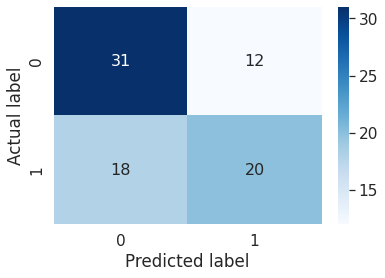

Classification report - 
               precision    recall  f1-score   support

           0       0.63      0.72      0.67        43
           1       0.62      0.53      0.57        38

    accuracy                           0.63        81
   macro avg       0.63      0.62      0.62        81
weighted avg       0.63      0.63      0.63        81



In [ ]:
evaluate_model(dt_default)

In [ ]:
dt_maxdepth = DecisionTreeClassifier(max_depth=3)
dt_maxdepth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

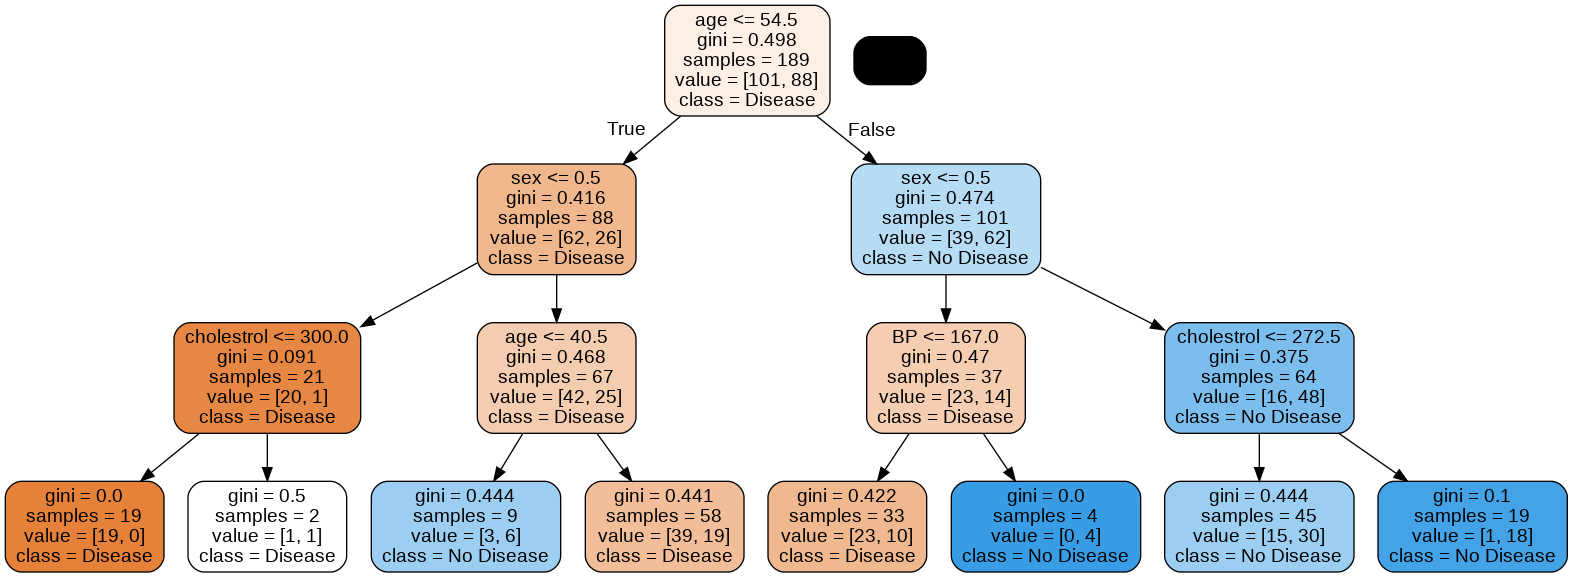

In [ ]:
gph = get_dt_graph(dt_maxdepth) 
Image(gph.create_png())

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:


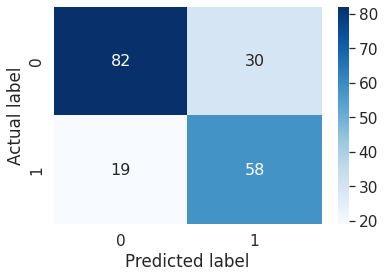

Classification report - 
               precision    recall  f1-score   support

           0       0.81      0.73      0.77       112
           1       0.66      0.75      0.70        77

    accuracy                           0.74       189
   macro avg       0.74      0.74      0.74       189
weighted avg       0.75      0.74      0.74       189

--------------------------------------------------
Test Accuracy : 0.6049382716049383
Test Confusion Matrix:


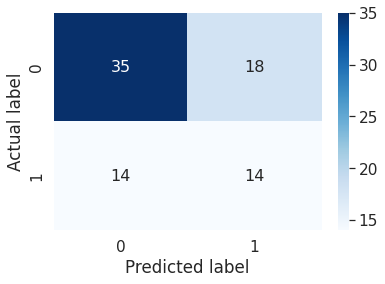

Classification report - 
               precision    recall  f1-score   support

           0       0.71      0.66      0.69        53
           1       0.44      0.50      0.47        28

    accuracy                           0.60        81
   macro avg       0.58      0.58      0.58        81
weighted avg       0.62      0.60      0.61        81



In [ ]:
evaluate_model(dt_maxdepth)

In [ ]:
dt_min_samples_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_samples_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20)

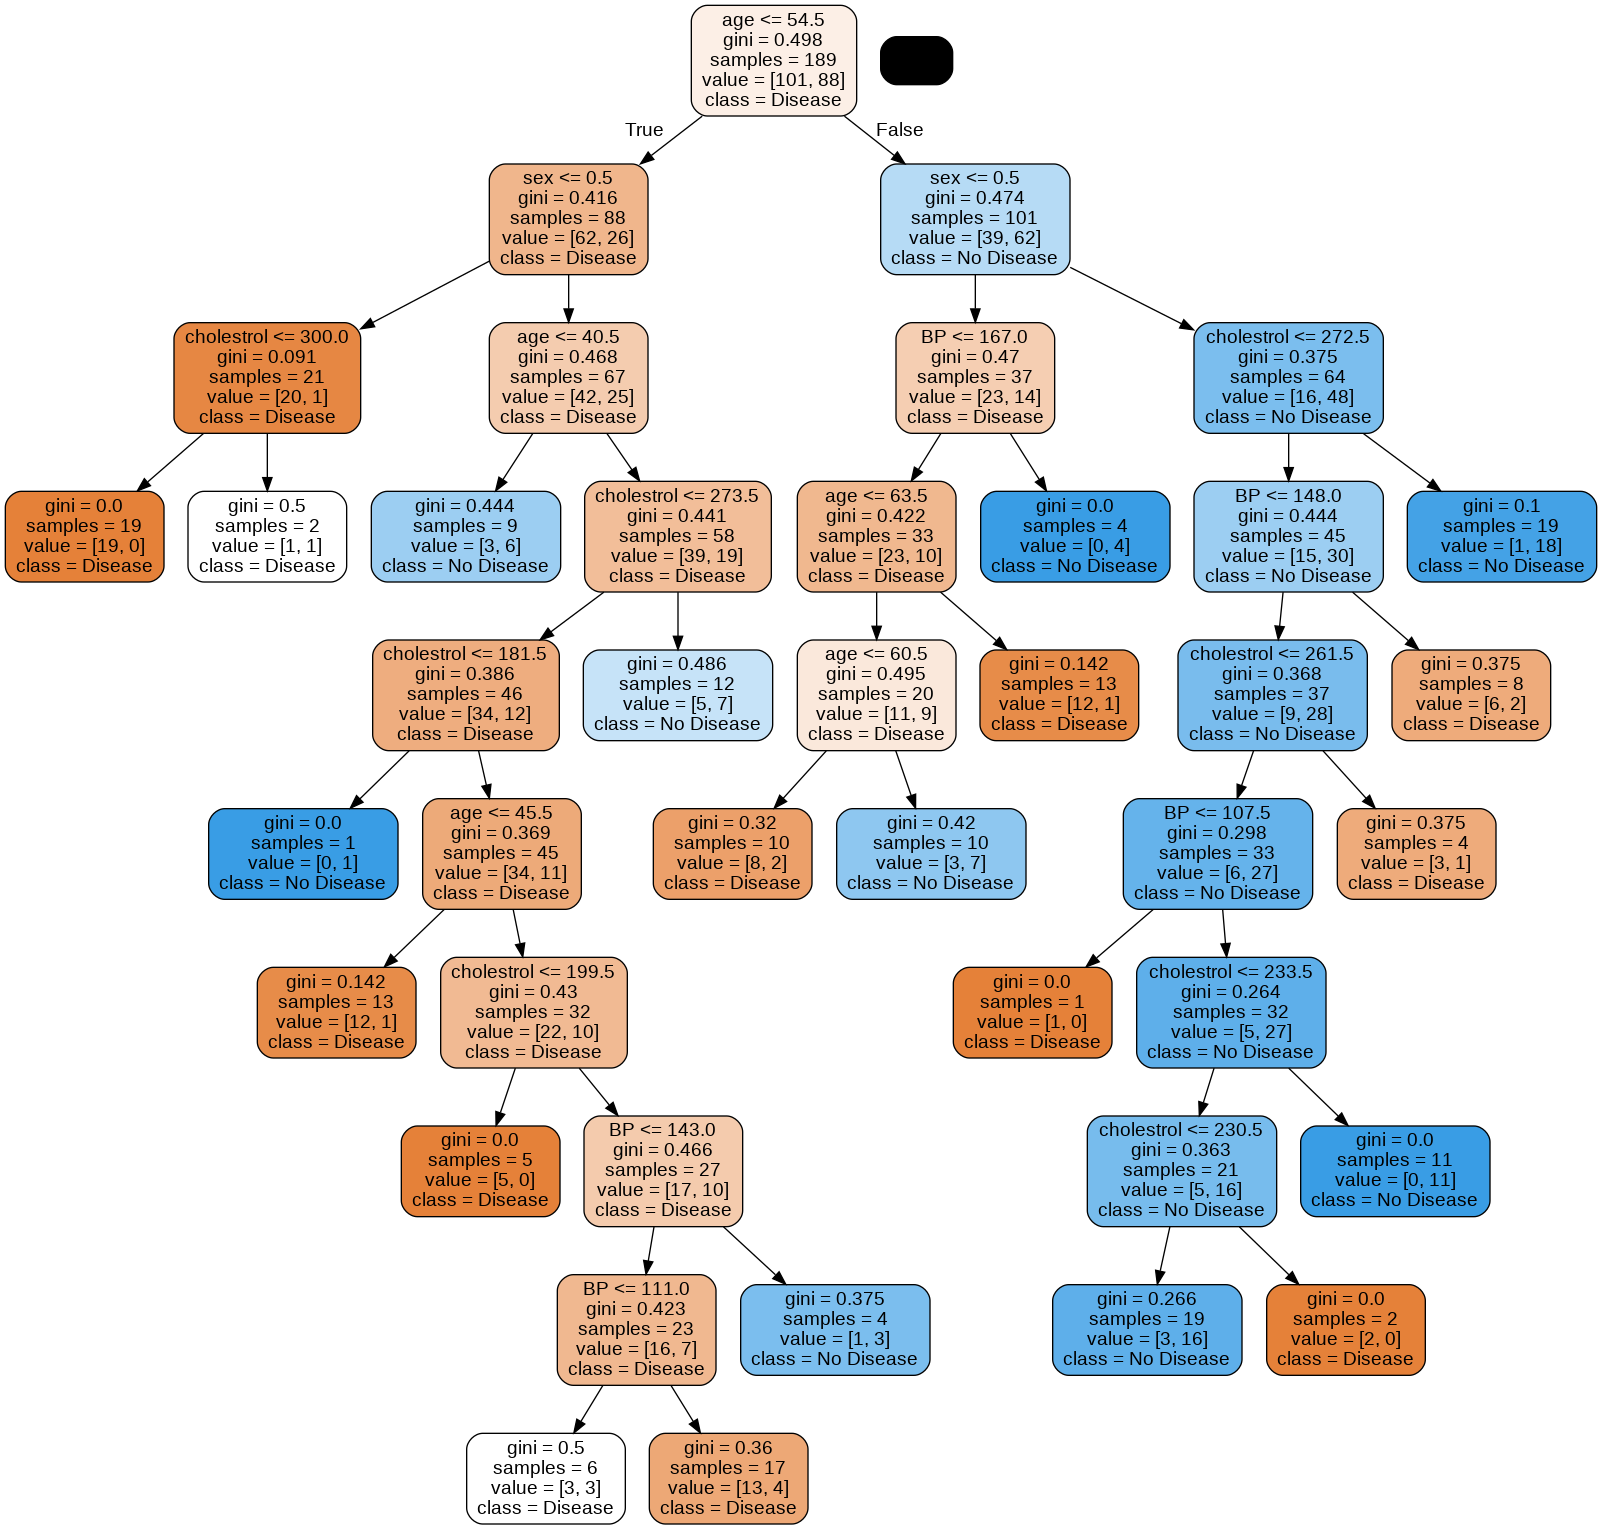

In [ ]:
gph = get_dt_graph(dt_min_samples_split) 
Image(gph.create_png())

Train Accuracy : 0.8359788359788359
Train Confusion Matrix:


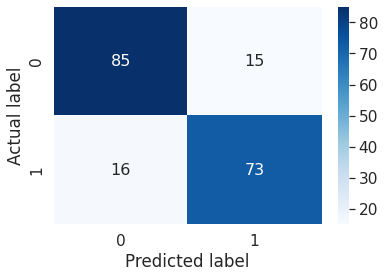

Classification report - 
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       100
           1       0.83      0.82      0.82        89

    accuracy                           0.84       189
   macro avg       0.84      0.84      0.84       189
weighted avg       0.84      0.84      0.84       189

--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:


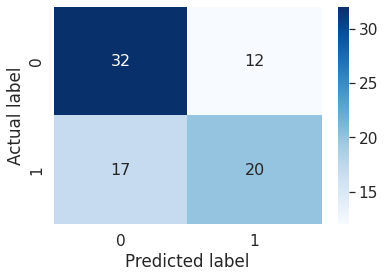

Classification report - 
               precision    recall  f1-score   support

           0       0.65      0.73      0.69        44
           1       0.62      0.54      0.58        37

    accuracy                           0.64        81
   macro avg       0.64      0.63      0.63        81
weighted avg       0.64      0.64      0.64        81



In [ ]:
evaluate_model(dt_min_samples_split)

In [ ]:
dt_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=35)
dt_min_samples_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=35)

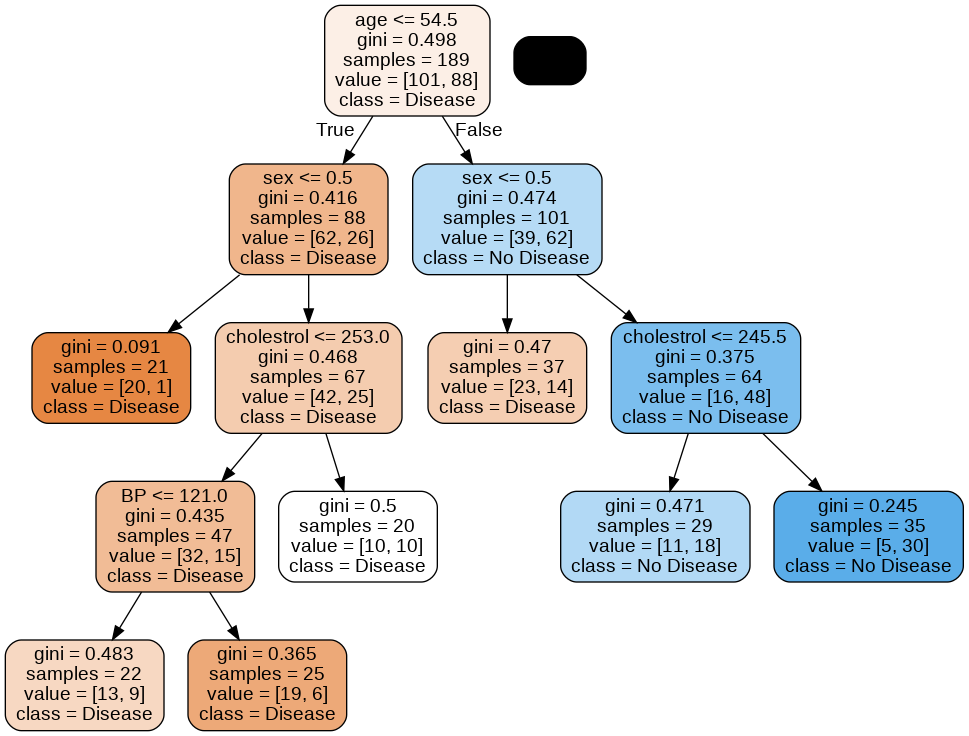

In [ ]:
gph = get_dt_graph(dt_min_samples_leaf)
Image(gph.create_png())

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:


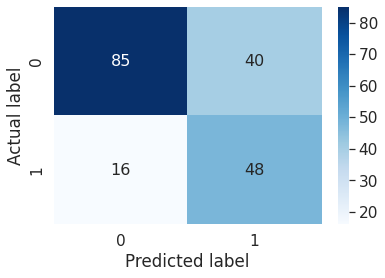

Classification report - 
               precision    recall  f1-score   support

           0       0.84      0.68      0.75       125
           1       0.55      0.75      0.63        64

    accuracy                           0.70       189
   macro avg       0.69      0.72      0.69       189
weighted avg       0.74      0.70      0.71       189

--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:


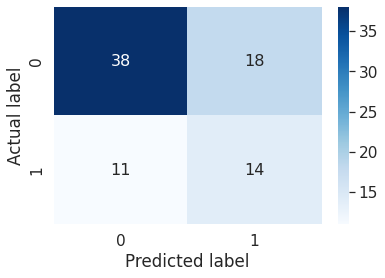

Classification report - 
               precision    recall  f1-score   support

           0       0.78      0.68      0.72        56
           1       0.44      0.56      0.49        25

    accuracy                           0.64        81
   macro avg       0.61      0.62      0.61        81
weighted avg       0.67      0.64      0.65        81



In [ ]:
evaluate_model(dt_min_samples_leaf)

In [ ]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

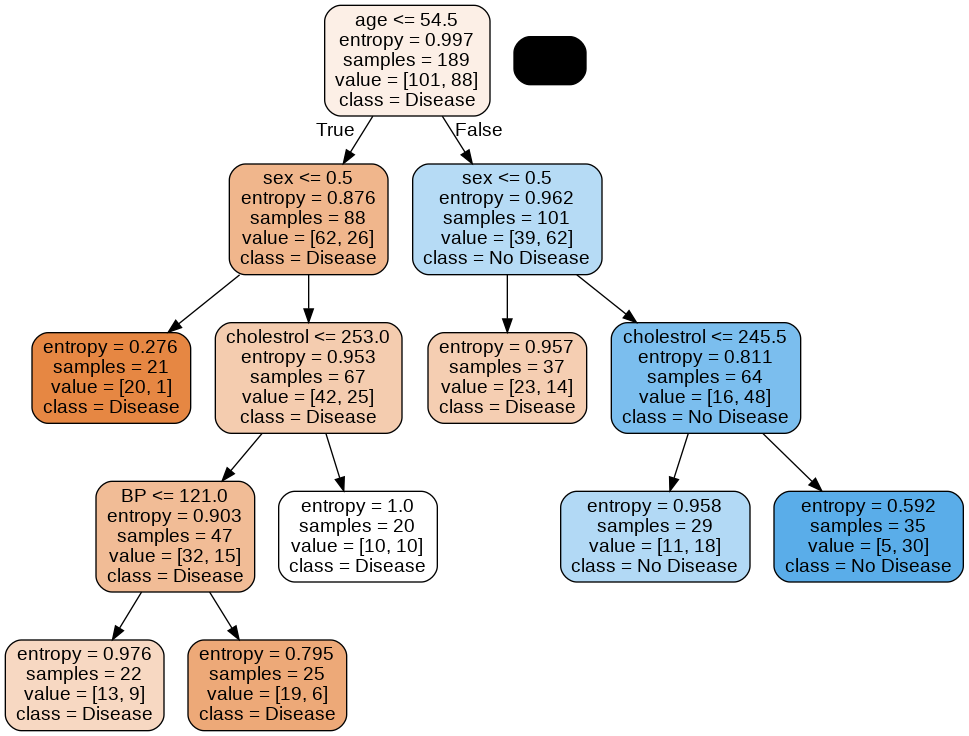

In [ ]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:


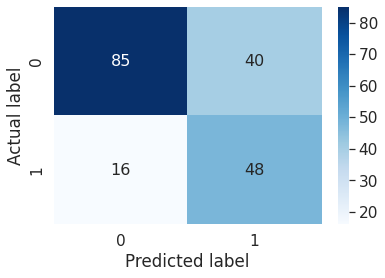

Classification report - 
               precision    recall  f1-score   support

           0       0.84      0.68      0.75       125
           1       0.55      0.75      0.63        64

    accuracy                           0.70       189
   macro avg       0.69      0.72      0.69       189
weighted avg       0.74      0.70      0.71       189

--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:


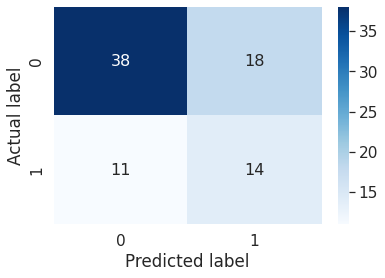

Classification report - 
               precision    recall  f1-score   support

           0       0.78      0.68      0.72        56
           1       0.44      0.56      0.49        25

    accuracy                           0.64        81
   macro avg       0.61      0.62      0.61        81
weighted avg       0.67      0.64      0.65        81



In [ ]:
evaluate_model(dt_min_leaf_entropy)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 5, 10, 15],
    'min_samples_leaf': [5, 10, 20, 40, 80],
    'criterion': ["gini", "entropy"]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=10, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
grid_search = GridSearchCV(estimator=dt, param_grid=params, 
                            cv=4, n_jobs=-1, verbose=1, scoring = "f1")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
CPU times: user 510 ms, sys: 10.7 ms, total: 521 ms
Wall time: 1.65 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 15],
                         'min_samples_leaf': [5, 10, 20, 40, 80]},
             scoring='accuracy', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.005681      0.003097  ...        0.082829                1
1       0.005076      0.002108  ...        0.082829                1
2       0.003812      0.000278  ...        0.082829                1
3       0.003913      0.000957  ...        0.097932               29
4       0.005201      0.002311  ...        0.074618               18

[5 rows x 21 columns]

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=42)

In [ ]:
dt_best = grid_search.best_estimator_

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:


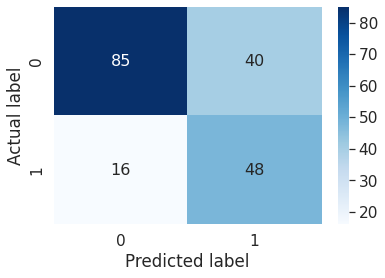

Classification report - 
               precision    recall  f1-score   support

           0       0.84      0.68      0.75       125
           1       0.55      0.75      0.63        64

    accuracy                           0.70       189
   macro avg       0.69      0.72      0.69       189
weighted avg       0.74      0.70      0.71       189

--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:


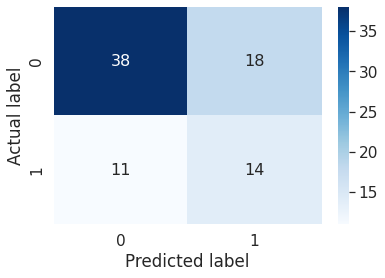

Classification report - 
               precision    recall  f1-score   support

           0       0.78      0.68      0.72        56
           1       0.44      0.56      0.49        25

    accuracy                           0.64        81
   macro avg       0.61      0.62      0.61        81
weighted avg       0.67      0.64      0.65        81



In [ ]:
evaluate_model(dt_best)

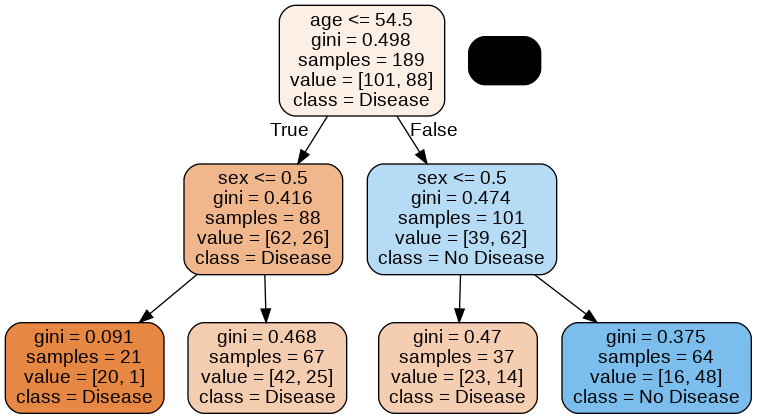

In [ ]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.metrics import recall_score,precision_score

In [ ]:
model1 = dt_best.predict_proba(X_train)

In [ ]:
model2 = dt_min_leaf_entropy.predict_proba(X_train)

In [ ]:
#Plot AUC-ROC
fpr1, tpr1, threshold1 = roc_curve(y_train, model1[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_train, model2[:,1])
roc_auc2 = auc(fpr2, tpr2)

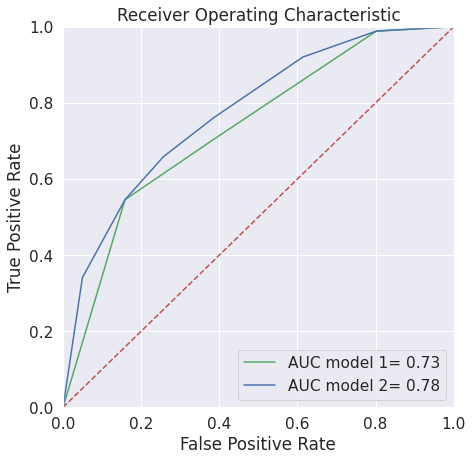

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'g', label = 'AUC model 1= %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'b', label = 'AUC model 2= %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [ ]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

In [ ]:
sample_tree = rf.estimators_[4]

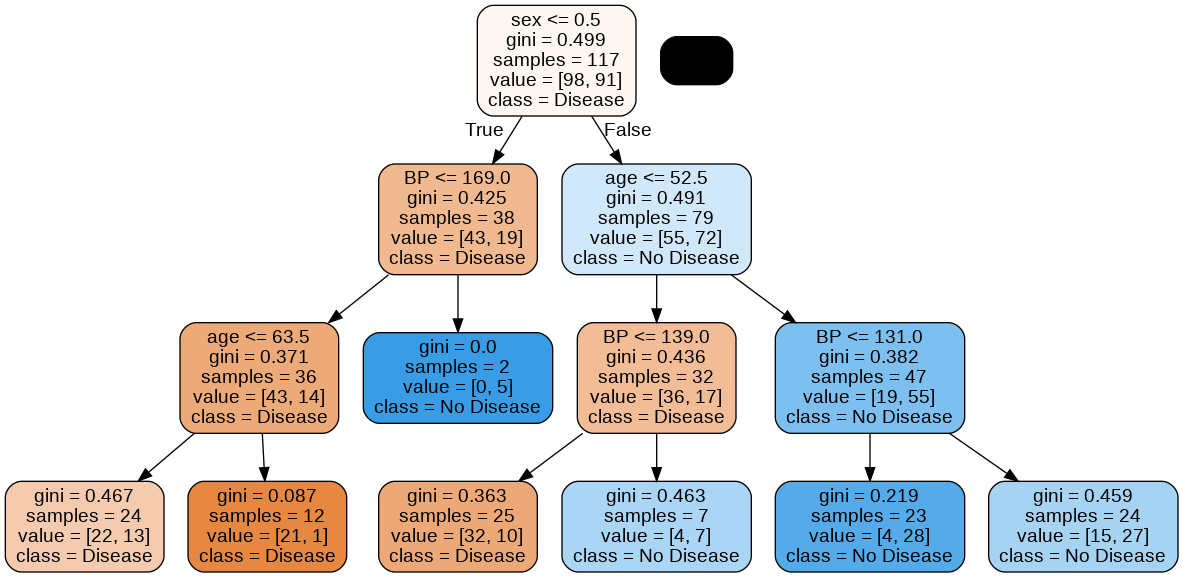

In [ ]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

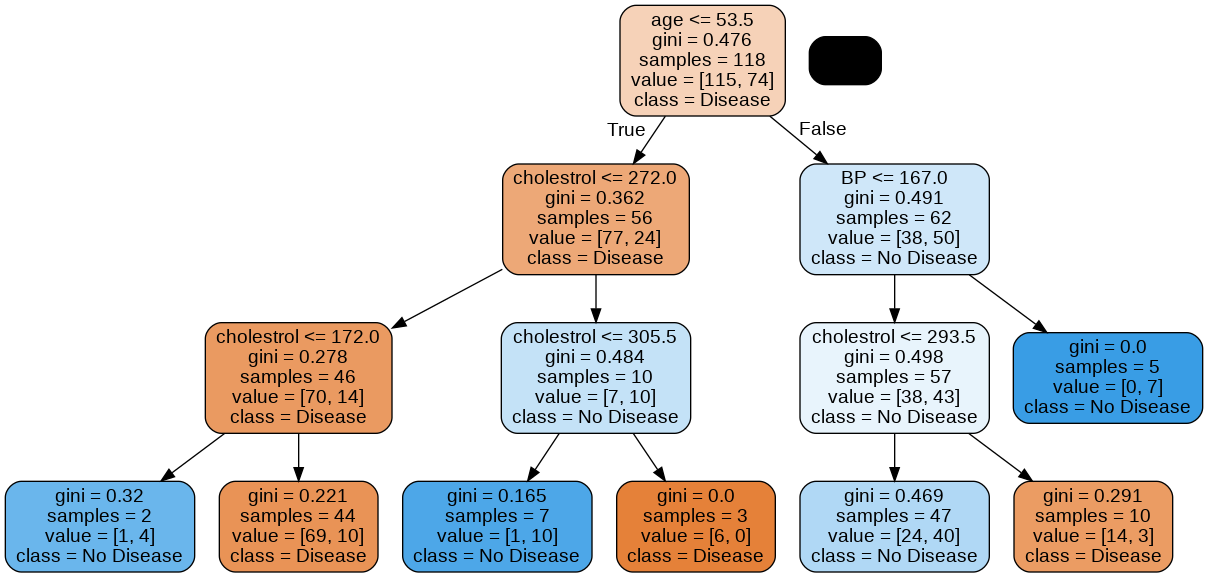

In [ ]:
gph = get_dt_graph(rf.estimators_[2])
Image(gph.create_png())

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:


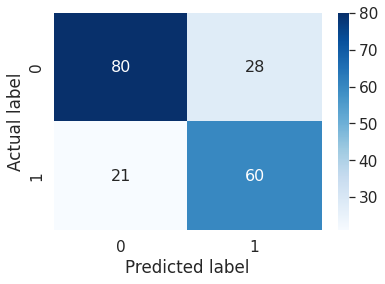

Classification report - 
               precision    recall  f1-score   support

           0       0.79      0.74      0.77       108
           1       0.68      0.74      0.71        81

    accuracy                           0.74       189
   macro avg       0.74      0.74      0.74       189
weighted avg       0.74      0.74      0.74       189

--------------------------------------------------
Test Accuracy : 0.6172839506172839
Test Confusion Matrix:


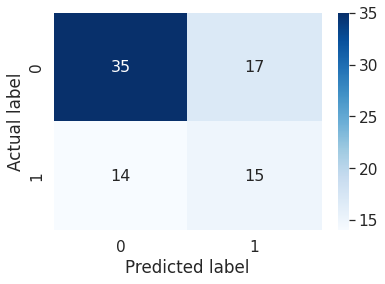

Classification report - 
               precision    recall  f1-score   support

           0       0.71      0.67      0.69        52
           1       0.47      0.52      0.49        29

    accuracy                           0.62        81
   macro avg       0.59      0.60      0.59        81
weighted avg       0.63      0.62      0.62        81



In [ ]:
evaluate_model(rf)

## Hyperparameter tuning

In [ ]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search.fit(X,y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
CPU times: user 8.88 s, sys: 339 ms, total: 9.22 s
Wall time: 4min 24s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
rf_best = grid_search.best_estimator_

In [ ]:
rf_best

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

Train Accuracy : 0.8042328042328042
Train Confusion Matrix:


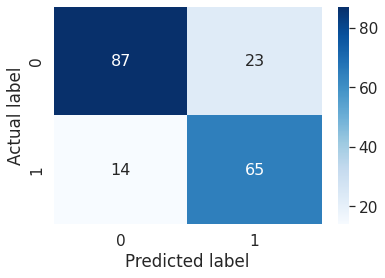

Classification report - 
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       110
           1       0.74      0.82      0.78        79

    accuracy                           0.80       189
   macro avg       0.80      0.81      0.80       189
weighted avg       0.81      0.80      0.81       189

--------------------------------------------------
Test Accuracy : 0.8024691358024691
Test Confusion Matrix:


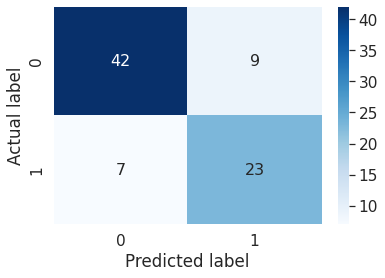

Classification report - 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84        51
           1       0.72      0.77      0.74        30

    accuracy                           0.80        81
   macro avg       0.79      0.80      0.79        81
weighted avg       0.81      0.80      0.80        81



In [ ]:
evaluate_model(rf_best)

In [ ]:
sample_tree = rf_best.estimators_[0]

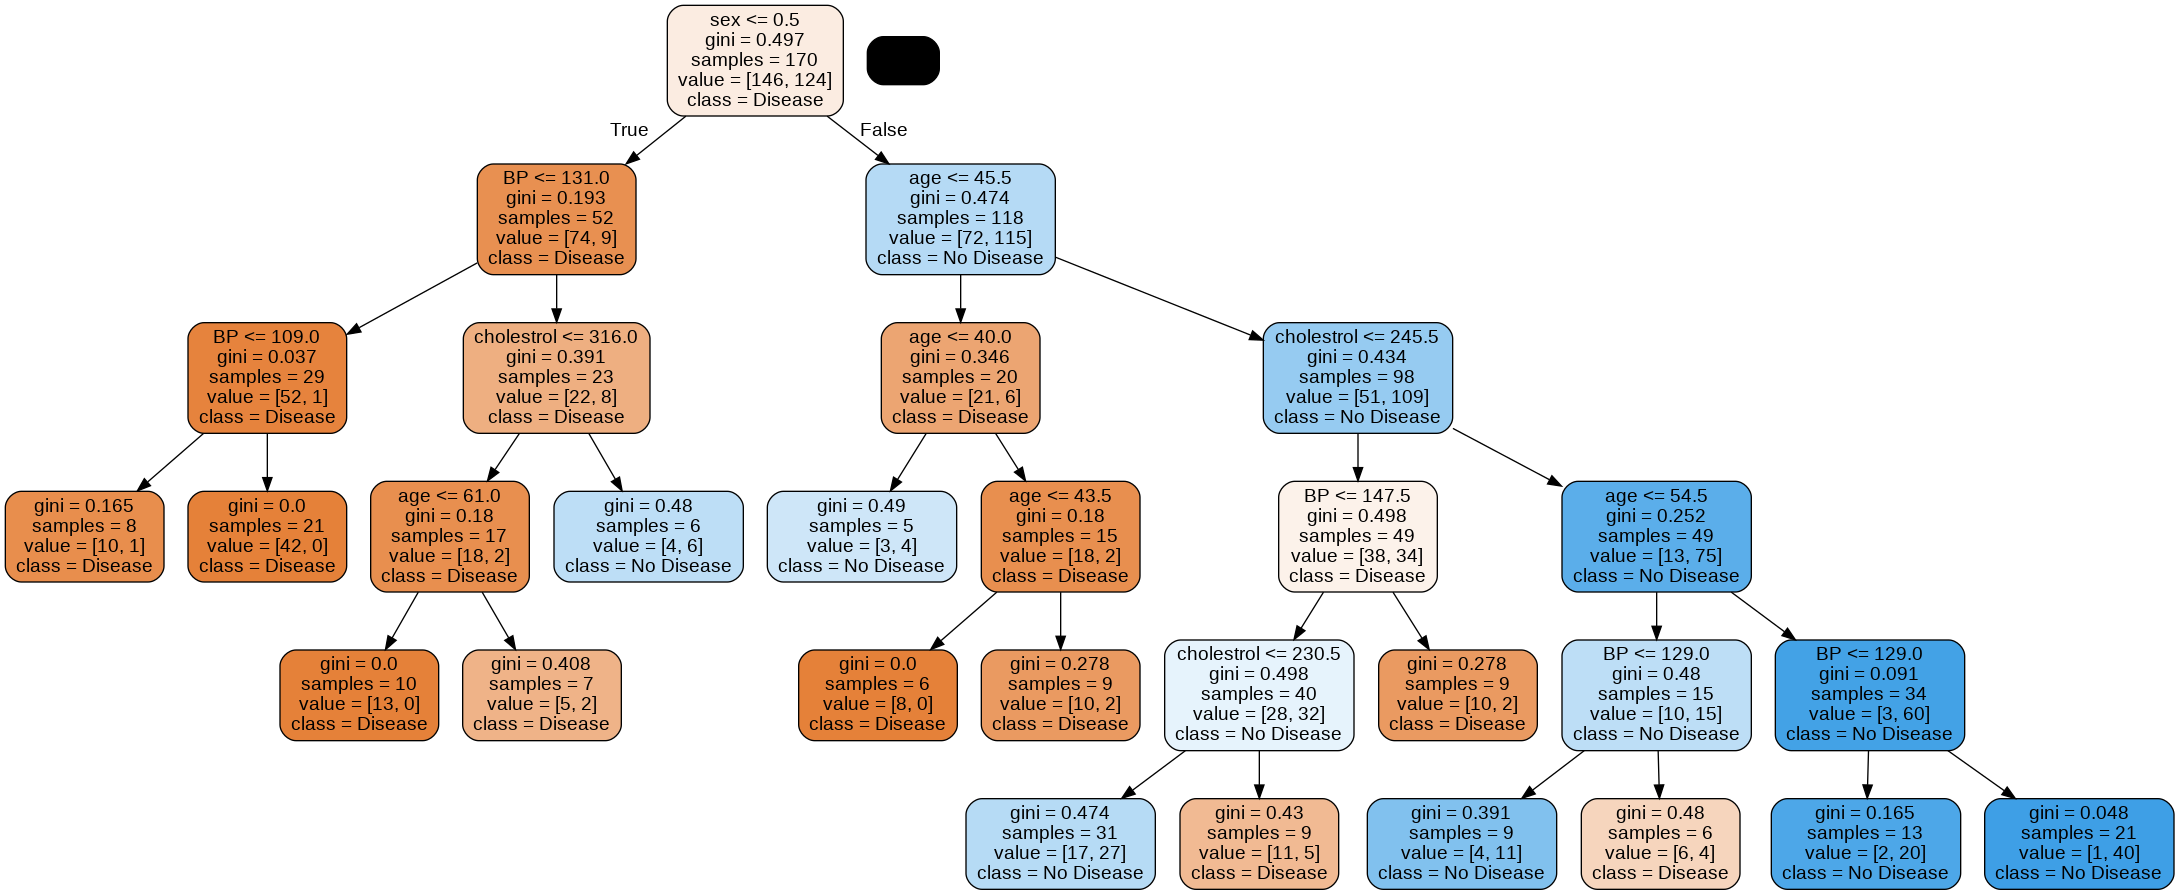

In [ ]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

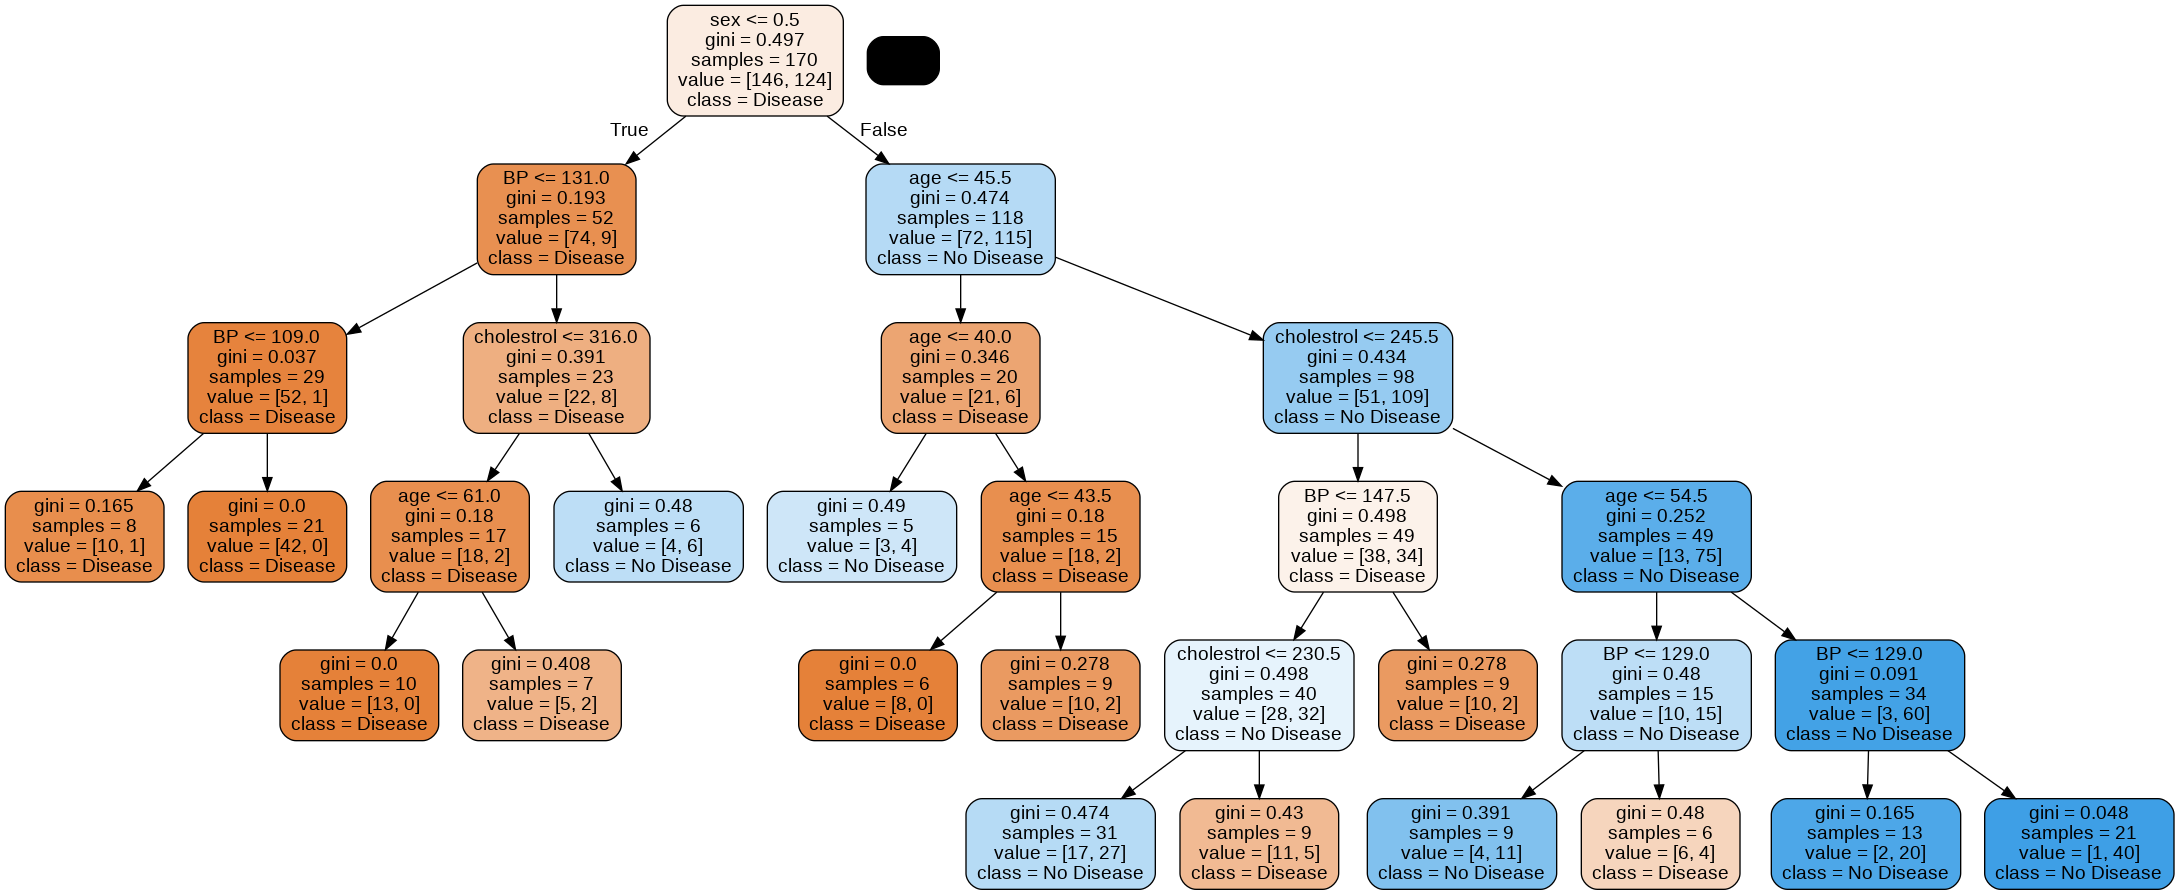

In [ ]:
gph = get_dt_graph(rf_best.estimators_[0])
Image(gph.create_png())

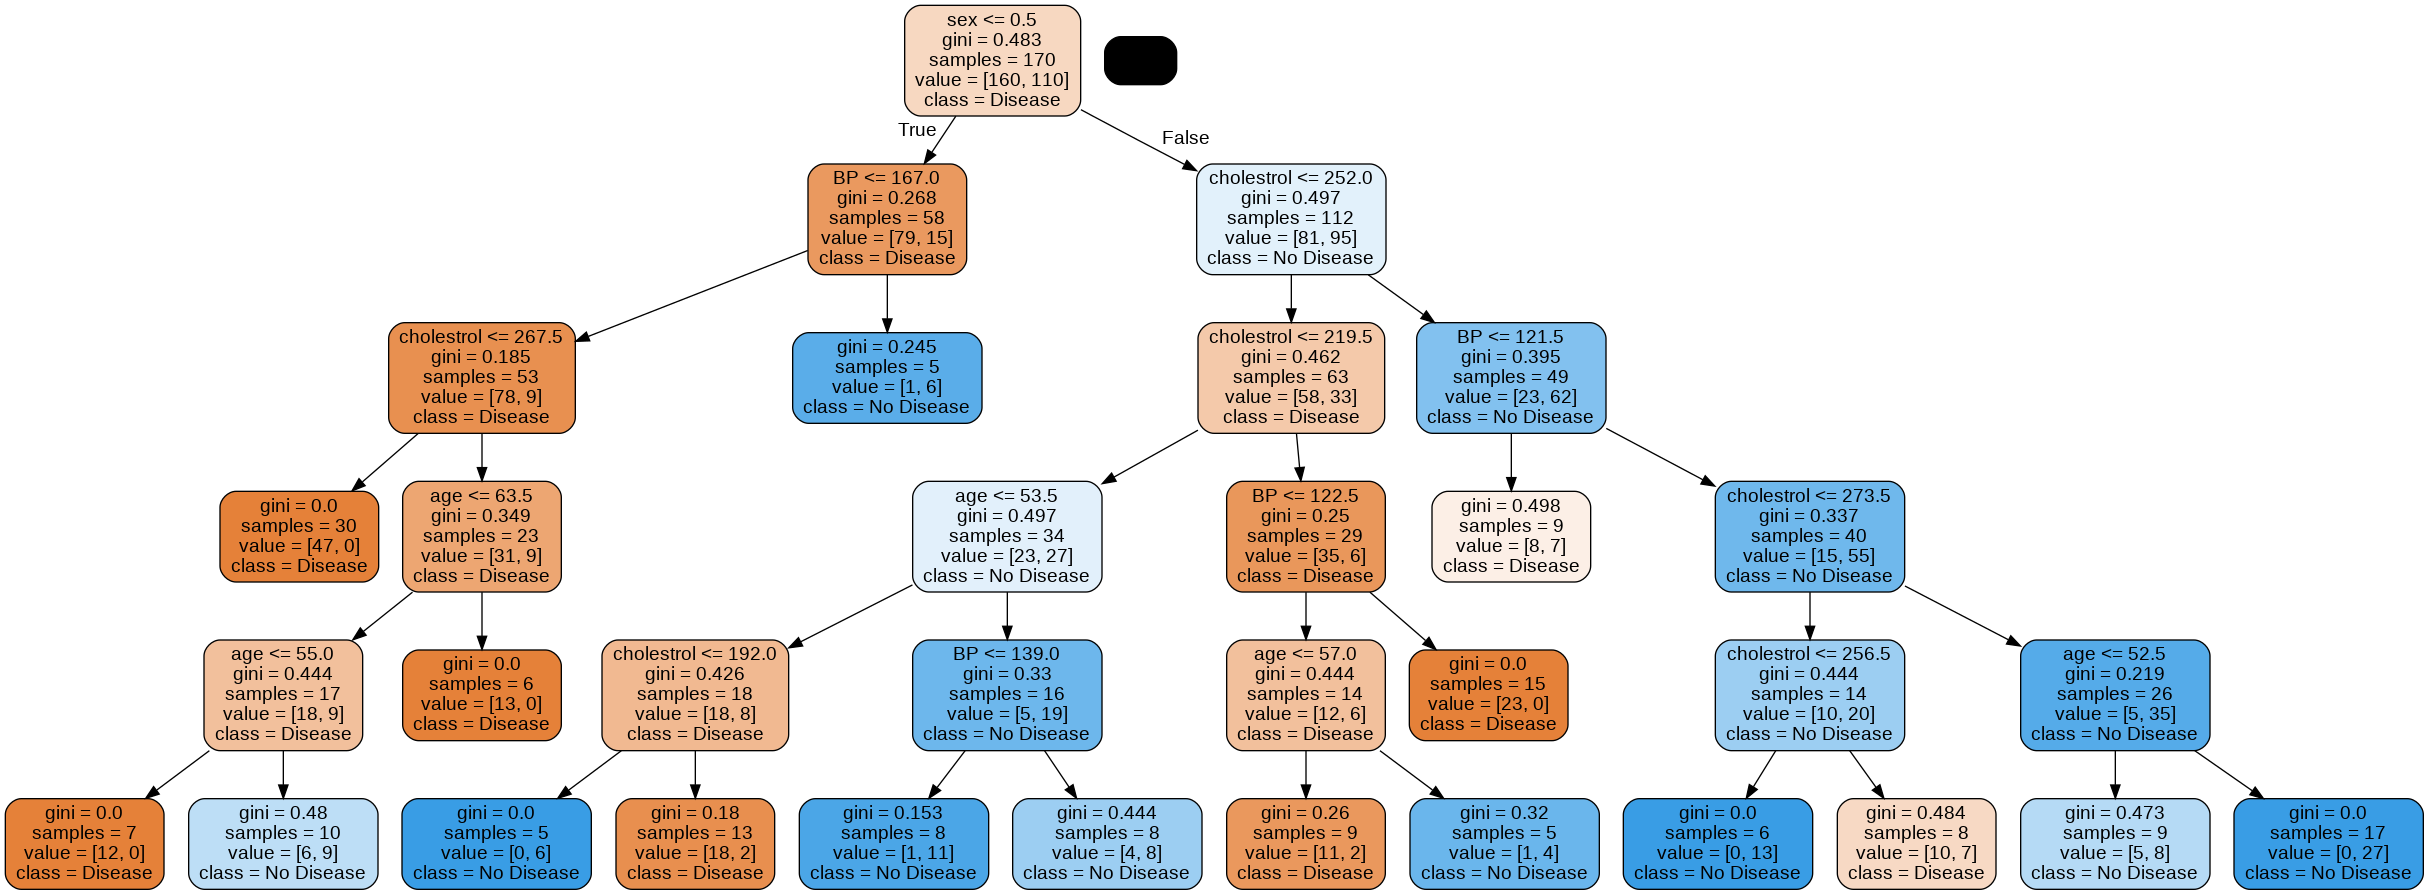

In [ ]:
gph = get_dt_graph(rf_best.estimators_[10])
Image(gph.create_png())

## Variable importance in RandomForest and Decision trees

In [ ]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [ ]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
classifier_rf.feature_importances_

array([0.37539743, 0.13780788, 0.20834585, 0.27844883])

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
0         age  0.375397
3  cholestrol  0.278449
2          BP  0.208346
1         sex  0.137808